<a href="https://colab.research.google.com/github/Ars160/AndroidCanvas/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xvzf aclImdb_v1.tar.gz
!ls

Выходные данные были обрезаны до нескольких последних строк (5000).
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclI

In [ ]:
import os
print(os.listdir("/content/aclImdb"))

['train', 'README', 'imdbEr.txt', 'test', 'imdb.vocab']


In [ ]:
import pandas as pd
import os

def load_reviews(folder_path, label, num_reviews=500):  # Переименовали параметр
    reviews_list = []  # Переименовали переменную, чтобы избежать путаницы
    for file_name in os.listdir(folder_path):
        if len(reviews_list) >= num_reviews:  # Прерываем загрузку, когда достигнут лимит
            break
        with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as f:
            reviews_list.append((f.read().strip(), label))  # Добавляем отзыв в список
    return reviews_list

# Пути к положительным и отрицательным отзывам
train_pos_path = "/content/aclImdb/train/pos"
train_neg_path = "/content/aclImdb/train/neg"

# Загружаем данные
pos_reviews = load_reviews(train_pos_path, label=1, num_reviews=500)
neg_reviews = load_reviews(train_neg_path, label=0, num_reviews=500)

# Создаем DataFrame
data = pd.DataFrame(pos_reviews + neg_reviews, columns=["review", "label"])

# Проверяем первые 5 строк
print(data.head())


                                              review  label
0  The performances were superb, the costumes del...      1
1  I was not expecting much from this movie. I wa...      1
2  Films such as Chocolat, Beau Travail, and othe...      1
3  I've seen The Blob several times and is one of...      1
4  Definitely one of the lesser of the Astaire/Ro...      1


In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 9.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Загружаем модель spaCy
nlp = spacy.load('en_core_web_md')

def preprocess(text):
    """Функция для очистки текста"""
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return " ".join(tokens)

# Применяем предобработку
sample_data["processed_review"] = sample_data["review"].apply(preprocess)

print(sample_data.head())  # Проверяем результат

                                              review  label  \
0  The performances were superb, the costumes del...      1   
1  I was not expecting much from this movie. I wa...      1   
2  Films such as Chocolat, Beau Travail, and othe...      1   
3  I've seen The Blob several times and is one of...      1   
4  Definitely one of the lesser of the Astaire/Ro...      1   

                                    processed_review  \
0  performance superb costume deliver unique feel...   
1  expect movie give ticket advanced screening ge...   
2  film chocolat beau travail propel french direc...   
3  see blob time well low budget alien invasion m...   
4  definitely less astaire roger musical poorly p...   

                                              vector  
0  [-0.7151161, 0.1686137, -0.0832166, -0.0346371...  
1  [-0.7096221, 0.14446652, -0.08895279, -0.10101...  
2  [-0.68917066, 0.108384356, -0.057477538, -0.05...  
3  [-0.7066746, 0.13071227, -0.10748304, 0.010537...  
4  [-0.70

In [ ]:
def get_review_vector(text):
    """Функция для извлечения векторов"""
    doc = nlp(text)
    return doc.vector  # Получаем средний вектор всего текста

# Преобразуем отзывы в векторы
sample_data["vector"] = sample_data["processed_review"].apply(get_review_vector)

print(sample_data["vector"].head())  # Проверяем векторы


0    [-0.7151161, 0.1686137, -0.0832166, -0.0346371...
1    [-0.7096221, 0.14446652, -0.08895279, -0.10101...
2    [-0.68917066, 0.108384356, -0.057477538, -0.05...
3    [-0.7066746, 0.13071227, -0.10748304, 0.010537...
4    [-0.7018807, 0.11867614, -0.067207456, -0.0806...
Name: vector, dtype: object


In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

X = torch.tensor(np.stack(sample_data["vector"].values), dtype=torch.float32)
y = torch.tensor(sample_data["label"].values, dtype=torch.float32).view(-1, 1)

# Разделяем на тренировочный и тестовый набор (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import torch.nn as nn
import torch.optim as optim

class SentimentModel(nn.Module):
    def __init__(self):
        super(SentimentModel, self).__init__()
        self.fc1 = nn.Linear(300, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)

# Создаем модель
model = SentimentModel()
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_function(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f"Эпоха {epoch+1}/{num_epochs}, Потери: {loss.item():.4f}")
with torch.no_grad():
    predictions = model(X_test)
    predictions = (predictions >= 0.5).float()  # Преобразуем в 0 или 1
    accuracy = (predictions == y_test).float().mean()
    print(f"Точность модели: {accuracy:.4f}")

Эпоха 1/10, Потери: 0.6927
Эпоха 2/10, Потери: 0.6901
Эпоха 3/10, Потери: 0.6877
Эпоха 4/10, Потери: 0.6853
Эпоха 5/10, Потери: 0.6829
Эпоха 6/10, Потери: 0.6803
Эпоха 7/10, Потери: 0.6777
Эпоха 8/10, Потери: 0.6749
Эпоха 9/10, Потери: 0.6721
Эпоха 10/10, Потери: 0.6691
Точность модели: 0.6910


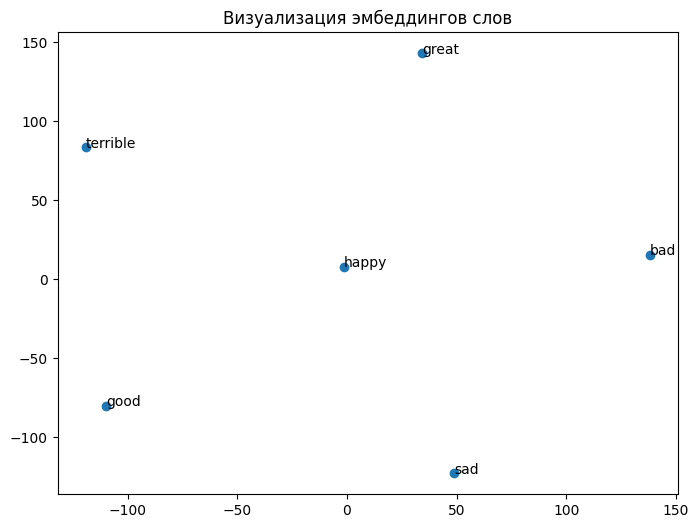

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_word_embeddings(words):
    word_vectors = np.array([nlp(word).vector for word in words])  # Преобразуем в numpy array
    tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Изменили perplexity на 5
    reduced = tsne.fit_transform(word_vectors)  # Применяем t-SNE

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1])  # Рисуем точки
    for i, word in enumerate(words):
        plt.annotate(word, (reduced[i, 0], reduced[i, 1]))  # Подписываем слова
    plt.title("Визуализация эмбеддингов слов")
    plt.show()

# Выбираем несколько слов для визуализации
plot_word_embeddings(["good", "bad", "happy", "sad", "great", "terrible"])
